In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plp
import seaborn as sbn

Lo que vamos a hacer, es realizar el analisis de ventas. Vamos a enfocarnos exclusivamente en el analisis visual,demas. Vamos a ver despues cual es la caracteristica que mas impacta en las ventas, y vamos a ver si podemos construir un modelo para poder predecir ventas.

In [2]:
data = pd.read_csv("Car_sales.csv")
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

Ahora lo que vamos a hacer es buscar en que columna hay valores faltantes y cuantos son. Tambien podemos ver que Manufacturer, Model y Vehicle_type son datos de tipo ordinal. La variable Latest_Launch es de tipo date

In [4]:
listna = [data[c].isnull().sum() for c in data.columns if data[c].isnull().sum() > 0]
lista_column_na = [c for c in data.columns if data[c].isnull().sum() > 0]

In [5]:
data_nan = pd.DataFrame(data = {"Columna": lista_column_na, "Cant.Valores faltantes": listna})
data_nan

,Columna,Cant.Valores faltantes
0,__year_resale_value,36
1,Price_in_thousands,2
2,Engine_size,1
3,Horsepower,1
4,Wheelbase,1
5,Width,1
6,Length,1
7,Curb_weight,2
8,Fuel_capacity,1
9,Fuel_efficiency,3


Asi vemos como la columna que tiene mas valores faltantes es __year_resale_value, que la vamos a eliminar por no ser objeto de nuestro estudio. Lo que vamos a hacer es llenar el resto de los valores faltantes con modelos de regresion

In [6]:
data = data.drop(["__year_resale_value"], axis = 1)
data

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


Vamos a usar funciones de sklearn para imputar estos valores perdidos. Lo que hace la funcion basicamente es crear modelos de regresion, donde se designa a la columna que tiene valores faltantes como variable dependiente de otras columnas, de forma que una vez estimado el modelo de regresion, se usan esos coeficientes estimados para estimar los valores faltantes. Esto se realiza para cada columna

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputation = IterativeImputer(max_iter = 10, random_state = 0)
data_x = data[data_nan["Columna"][1:]].to_numpy()
imputation.fit(data_x)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [8]:
print(imputation.transform(data_x))

[[ 21.5          1.8        140.         ...  13.2         28.
   58.28014952]
 [ 28.4          3.2        225.         ...  17.2         25.
   91.37077766]
 [ -8.74058903   3.2        225.         ...  17.2         26.
   77.04359121]
 ...
 [ 28.8          2.4        168.         ...  17.9         25.
   71.1559776 ]
 [ 45.5          2.3        236.         ...  18.5         23.
  101.6233572 ]
 [ 36.           2.9        201.         ...  21.1         24.
   85.73565451]]


In [9]:
data_x = imputation.transform(data_x)
data_x = pd.DataFrame(data = data_x, columns = data_nan["Columna"][1:])

In [10]:
data_x

Columna,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,-8.740589,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...
152,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [11]:
data_x_2 = data.loc[:, ["Manufacturer", "Model", "Sales_in_thousands", "Vehicle_type", "Latest_Launch"]]
data_x_2

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Latest_Launch
0,Acura,Integra,16.919,Passenger,2/2/2012
1,Acura,TL,39.384,Passenger,6/3/2011
2,Acura,CL,14.114,Passenger,1/4/2012
3,Acura,RL,8.588,Passenger,3/10/2011
4,Audi,A4,20.397,Passenger,10/8/2011
...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,9/21/2011
153,Volvo,S70,15.245,Passenger,11/24/2012
154,Volvo,V70,17.531,Passenger,6/25/2011
155,Volvo,C70,3.493,Passenger,4/26/2011


Ahora vamos a fusionar las dos tablas para unificar los datasets ya sin valores faltantes

In [12]:
newdata = pd.merge(data_x_2, data_x, right_index = True, left_index = True)
newdata

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Latest_Launch,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,2/2/2012,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,6/3/2011,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,CL,14.114,Passenger,1/4/2012,-8.740589,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,77.043591
3,Acura,RL,8.588,Passenger,3/10/2011,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,10/8/2011,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,9/21/2011,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,S70,15.245,Passenger,11/24/2012,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,V70,17.531,Passenger,6/25/2011,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,C70,3.493,Passenger,4/26/2011,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


Ahora vamos a ver si realmente lo que hicimos funciono, es decir, si ya no existen valores faltantes en todo el dataset. 

In [13]:
listna = [newdata[c].isnull().sum() for c in newdata.columns if newdata[c].isnull().sum() > 0]
lista_column_na = [c for c in newdata.columns if newdata[c].isnull().sum() > 0]
data_nan = pd.DataFrame(data = {"Columna": lista_column_na, "Cant.Valores faltantes": listna})
data_nan

,Columna,Cant.Valores faltantes


Vimos como el data frame esta vacio, por lo cual podemos decir que nuestra imputacion funciono de manera correcta

Ahora pasaremos a hacer el analisis de estadistica descriptiva.

In [14]:
newdata.describe()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,27.159144,3.060897,185.948718,107.487179,71.15000,187.343590,3.380776,17.951923,23.847318,77.043591
std,68.029422,14.547993,1.041299,56.518297,7.616772,3.44079,13.388635,0.627382,3.875440,4.242383,24.980973
min,0.110000,-8.740589,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,17.890000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,22.799000,3.000000,180.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.807009,19.500000,26.000000,89.401935
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


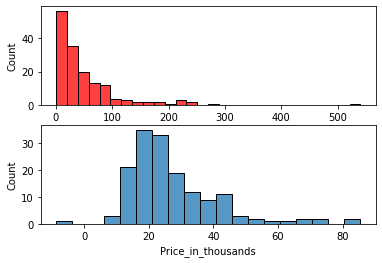

In [15]:
fig, ax = plp.subplots(2)
sbn.histplot(newdata["Sales_in_thousands"], ax = ax[0], color = "r")
sbn.histplot(newdata["Price_in_thousands"], ax = ax[1])

Podemos verificar lo que dijimos, claramente, graficando los histogramas para ver como se distribuyen las variables de ventas y de precio

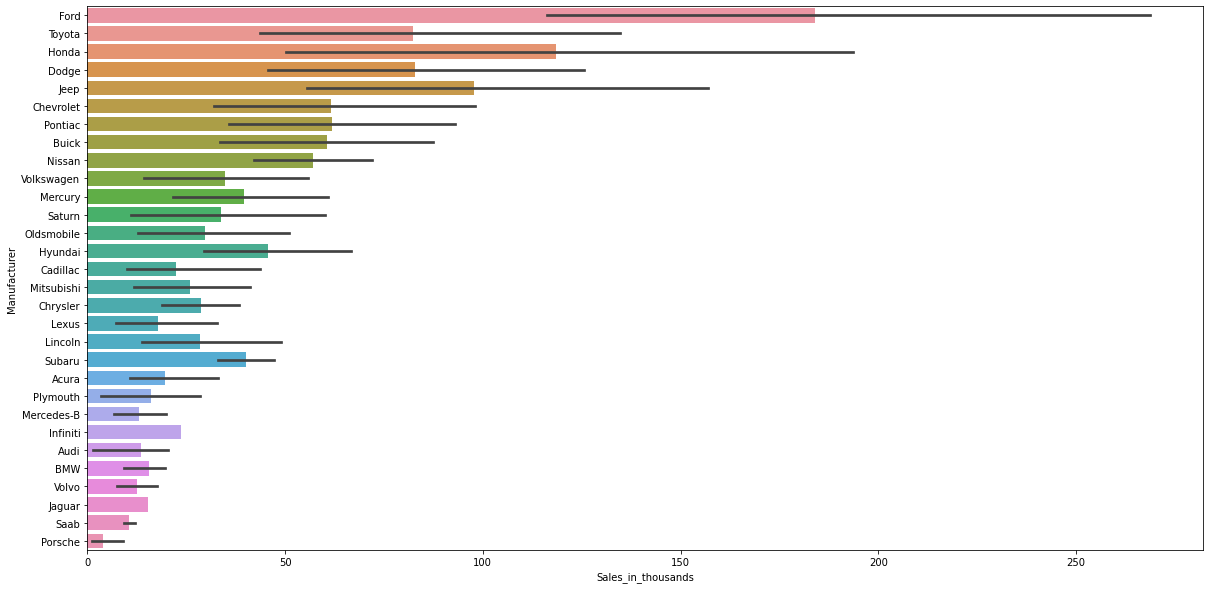

In [ ]:
fig, ax1 = plp.subplots(1, figsize = (20, 10))
newdata_1 = newdata.sort_values(by = ["Sales_in_thousands"], ascending = False)
sbn.barplot(x = "Sales_in_thousands", y = "Manufacturer", data = newdata_1, ax = ax1)

Tambien podemos ver las marcas con los precios mas altos, que nos puede dar una indicacion del nivel de calidad percibida por el publico

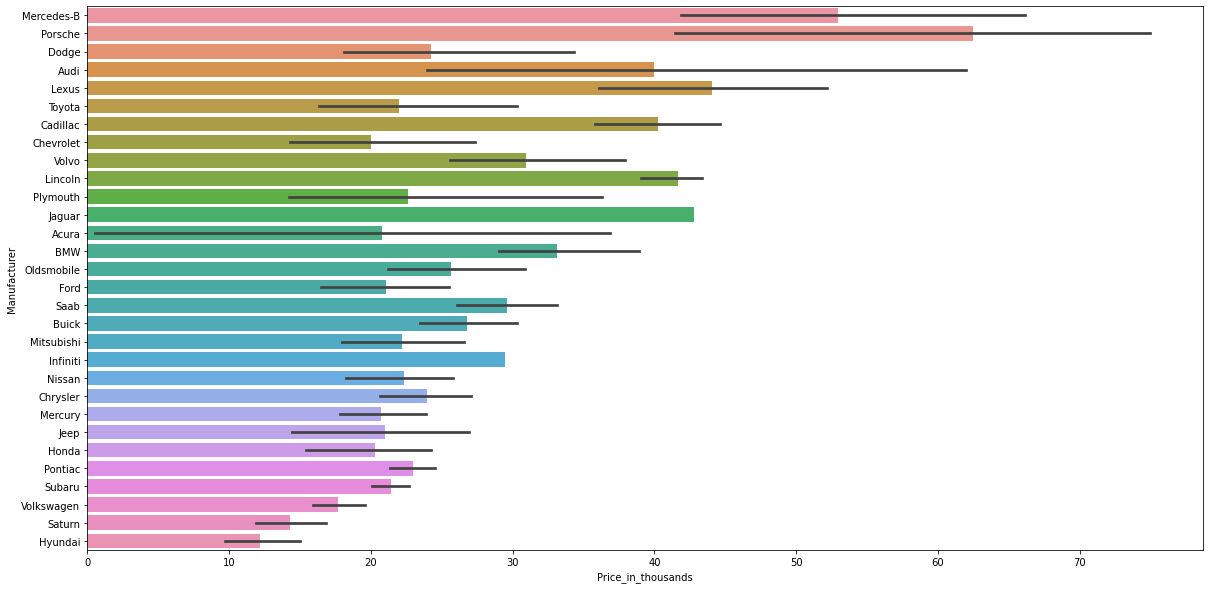

In [ ]:
fig, ax2 = plp.subplots(1, figsize = (20, 10))
newdata_2 = newdata.sort_values(by = ["Price_in_thousands"], ascending = False)
sbn.barplot(x = "Price_in_thousands", y = "Manufacturer", data = newdata_2, ax = ax2)

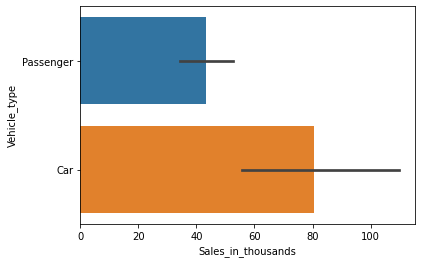

In [ ]:
sbn.barplot(x = "Sales_in_thousands", y = "Vehicle_type", data = newdata)

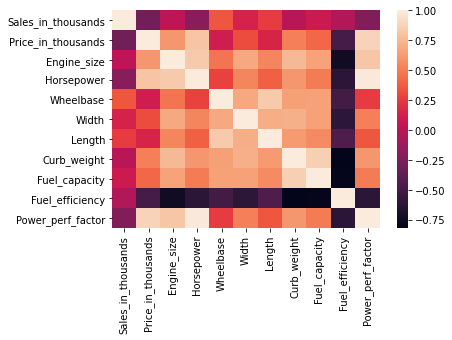

In [ ]:
sbn.heatmap(data = newdata.drop(["Latest_Launch"], axis = 1).corr())

De todas formas vamos a ver si con un pairplot podemos detectar algunas relaciones y correlaciones entre los graficos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

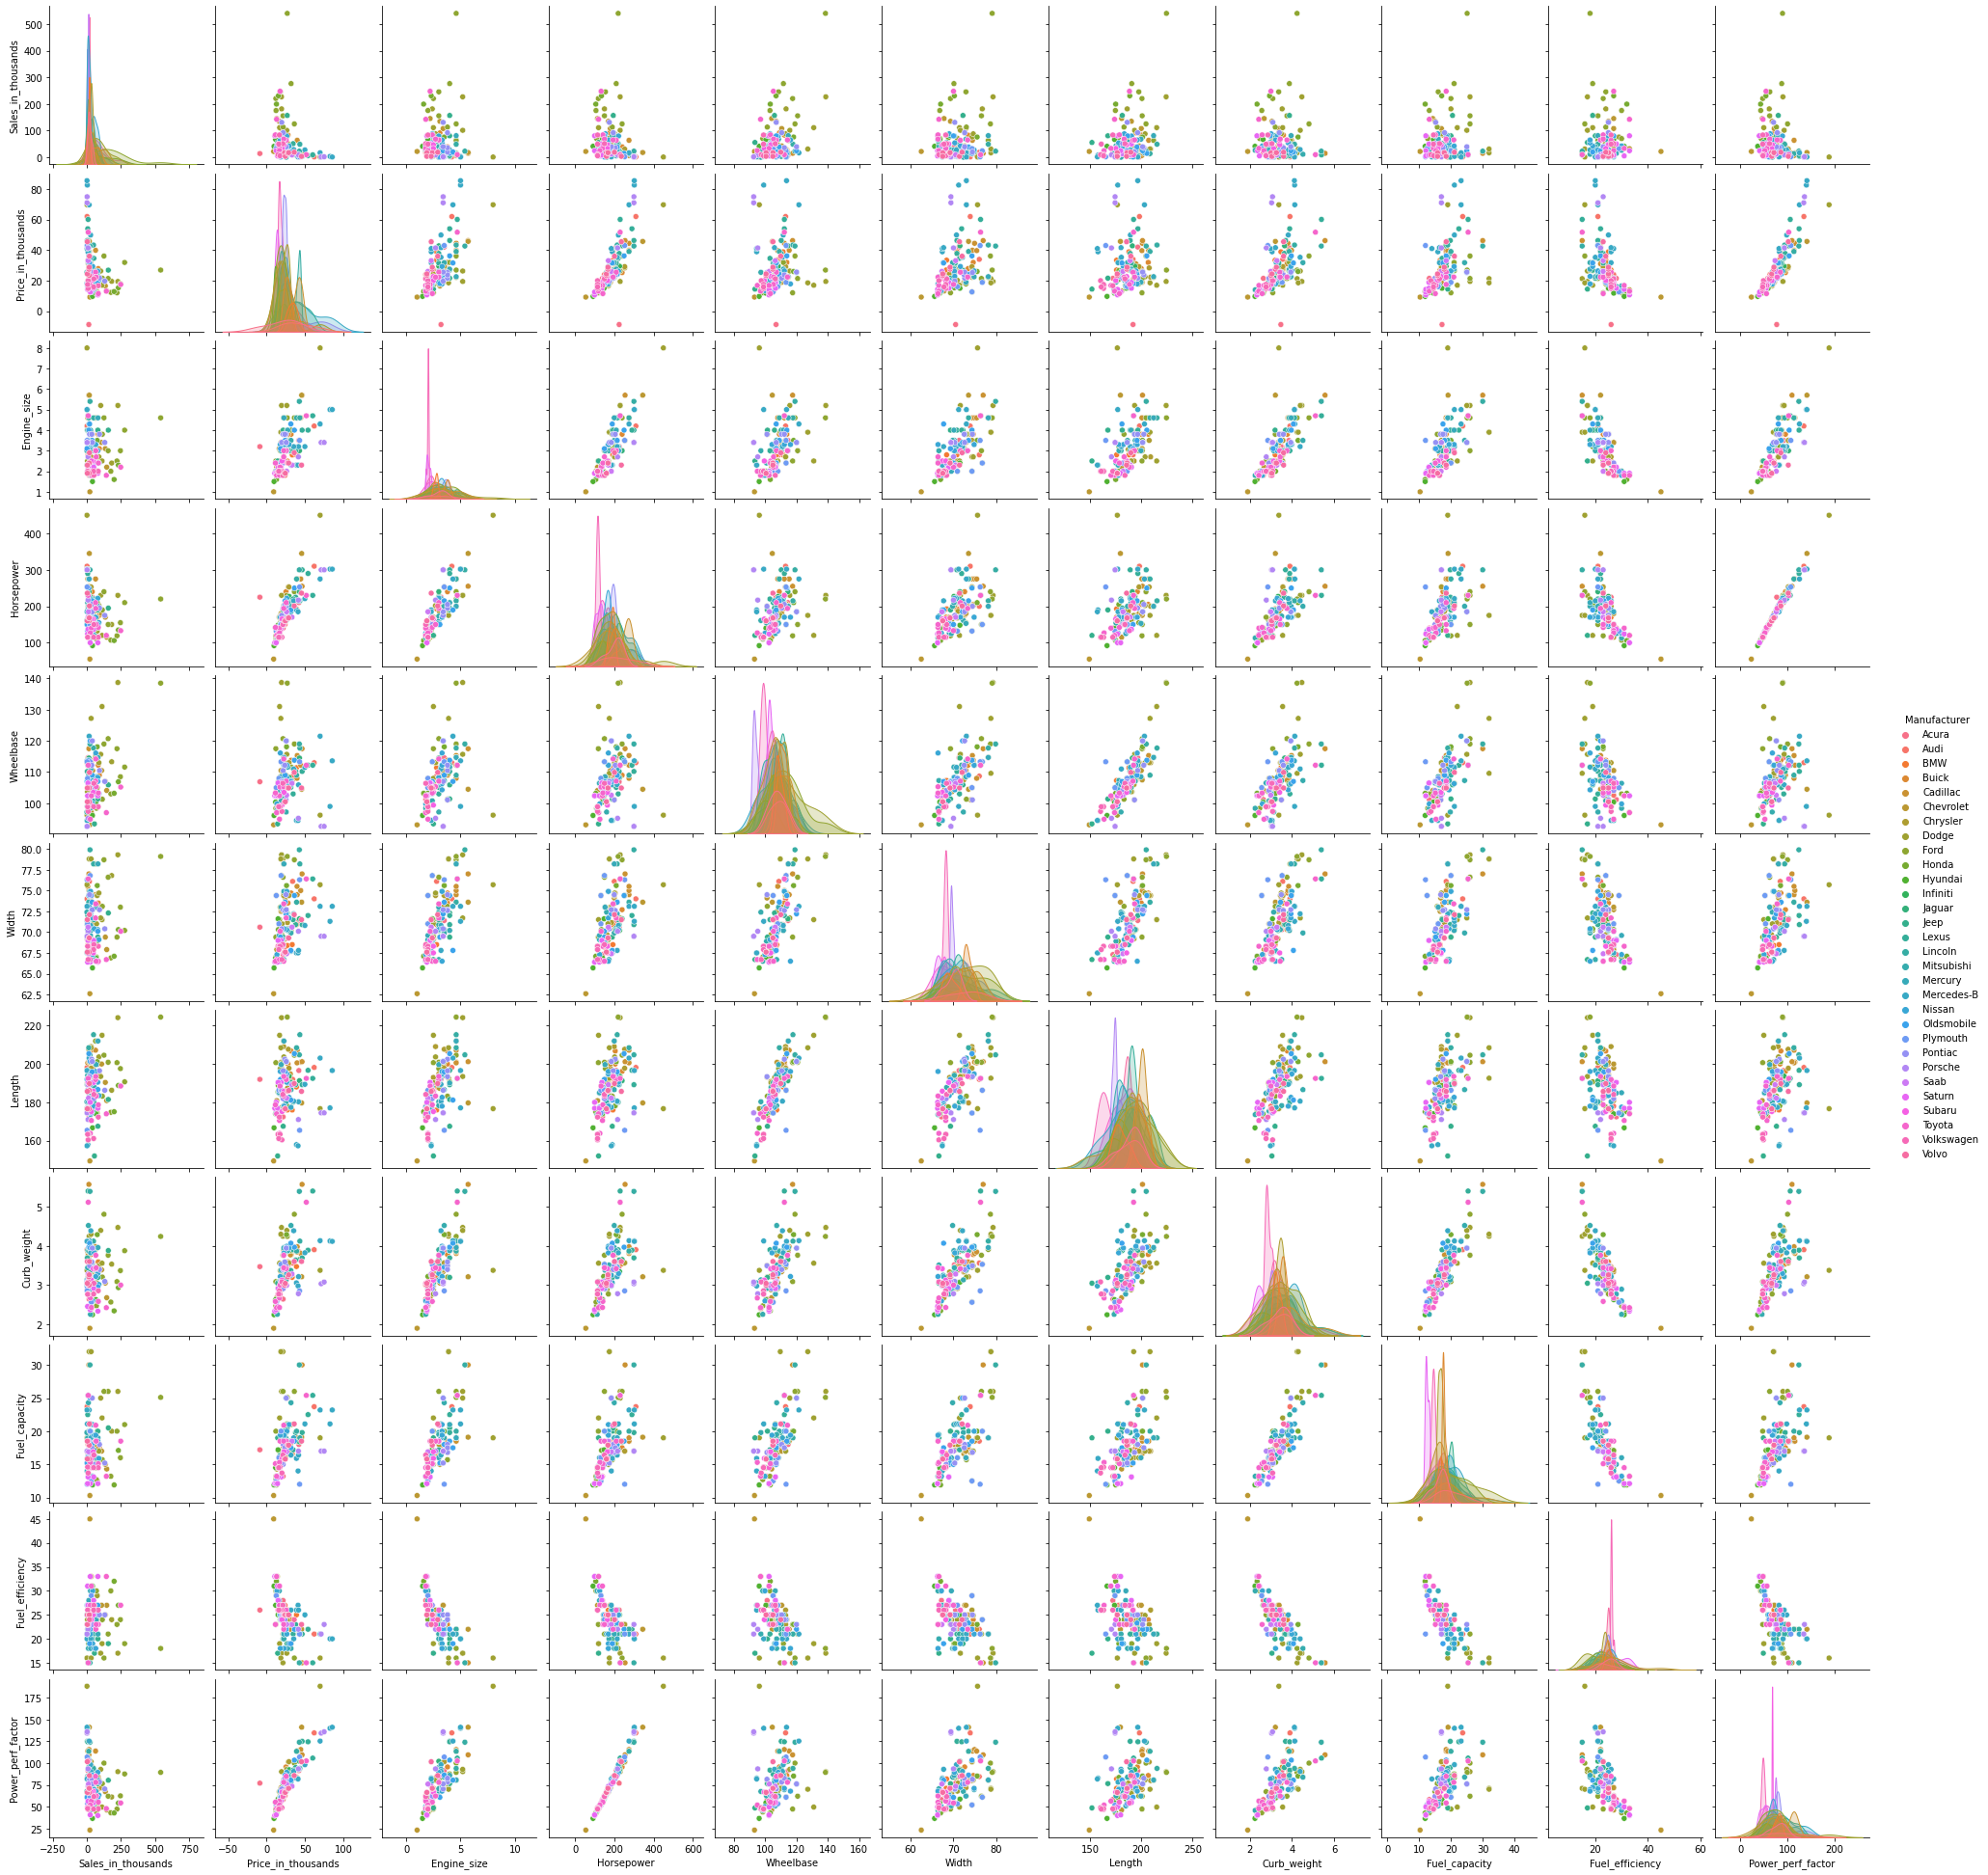

In [ ]:
sbn.pairplot(data = newdata, hue = "Manufacturer")

Vamos a ver si PCA nos puede ayudar a entender mejor el dataset a partir de la varianza explicada de cada componente. Vamos a eliminar la columna 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Scaler = StandardScaler()
Scaler.fit(newdata.drop(["Model", "Manufacturer", "Latest_Launch", "Vehicle_type"], axis = 1))

X_PCA = Scaler.transform(newdata.drop(["Model", "Manufacturer", "Latest_Launch", "Vehicle_type"], axis = 1))


In [17]:
model_PCA = PCA(n_components = 2)
model_PCA.fit(X_PCA)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(model_PCA.explained_variance_ratio_), print(model_PCA.components_), print(model_PCA.explained_variance_ratio_.sum())

[0.5830358  0.19448637]
[[-0.00729459 -0.26297183 -0.35587229 -0.32723604 -0.26533834 -0.31813254
  -0.27379933 -0.35730051 -0.32926332  0.33001607 -0.32480253]
 [ 0.47595193 -0.41958628 -0.08670757 -0.31160606  0.42755502  0.1983215
   0.35311542  0.08097122  0.14373321 -0.00644295 -0.34455519]]
0.7775221729173576


(None, None, None)

In [19]:
newdata["PCA1"] = X_PCA[:, 0]
newdata["PCA2"] = X_PCA[:, 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


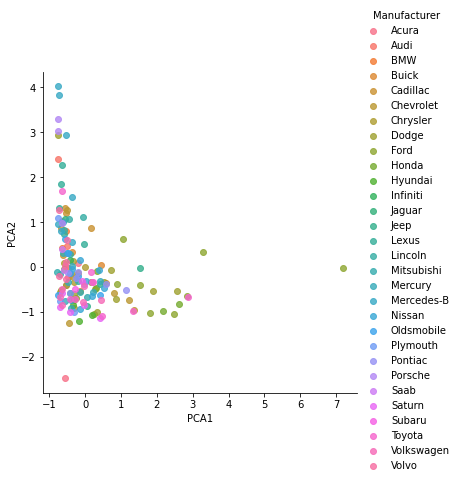

In [20]:
sbn.lmplot("PCA1", "PCA2", hue = "Manufacturer", data = newdata, fit_reg = False)

Podemos ver que no estan bien separados las marcas, lo cual significa que si queremos clasificar de mejor manera por marca, debemos crear modelos complejos

In [21]:
newdata = newdata.drop(["Latest_Launch"], axis = 1)

In [22]:
newdata = pd.get_dummies(newdata, drop_first = 1)

Ahora vemos que con los nuevos datos, tenemos un problema de dimensionalidad. Esto es debido a que tenemos mas columnas que filas en si, es decir, tenemos mayor numero de caracteristicas que de datos. Lo que vamos a hacer es reducir esta dimensionalidad, seleccionando las variables mas importantes

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
X = newdata.drop(["Sales_in_thousands", "PCA1", "PCA2"], axis = 1)
Y = newdata["Sales_in_thousands"]
Selector = RFE(linear_model, n_features_to_select = 20)
Selector.fit(X, Y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=20, step=1, verbose=0)

In [24]:
X.columns[Selector.support_]

Index(['Manufacturer_Ford', 'Model_Accord', 'Model_Camry', 'Model_Caravan',
       'Model_Cavalier', 'Model_Century', 'Model_Civic', 'Model_Contour',
       'Model_Corolla', 'Model_Crown Victoria', 'Model_Dakota', 'Model_Escort',
       'Model_Explorer', 'Model_F-Series', 'Model_Grand Am',
       'Model_Grand Cherokee', 'Model_Grand Prix', 'Model_Impala',
       'Model_Malibu', 'Model_Taurus'],
      dtype='object')

Pareciera ser que los modelos accord, camry y caravan impactan en las ventas. Que la marca Ford se encuentre dentro de las 20 variables que mas impactan en las ventas, significa que es la marca que mas ventas tiene, que es coherente con lo obtenido en el analisis grafico.

In [25]:
X = X.loc[:, ['Manufacturer_Ford', 'Model_Accord', 'Model_Camry', 'Model_Caravan', 'Model_Cavalier', 'Model_Civic', 'Model_Contour', 'Model_Corolla','Model_Crown Victoria', 'Model_Dakota', 'Model_Escort', 'Model_Explorer', 'Model_F-Series', 'Model_Grand Am', 'Model_Grand Cherokee', 'Model_Impala', 'Model_Malibu', 'Model_Ram Pickup', 'Model_Ranger', 'Model_Taurus']].to_numpy()
Y = Y.to_numpy()

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2)
linear_model.fit(X_train, Y_train)

y_pred = linear_model.predict(x_test)

print("R2: ", mean_squared_error(y_test, y_pred))

R2:  1534.6669941457105


CONCLUSIONES:
- La venta promedio tiene el valor 52.000 dolares, pero que aun asi puede contener muchos outliers, ya que el maximo es de 540.000 dolares. Otro dato interesante es el precio promedio, que es de 27.000 dolares.
- Podemos ver claramente que las marcas de coches que mas se vendieron son Ford, Honda, y Jeep.
- Los autos mas caros son Porsche, Mercedes-B y Lexus. En cuarto lugar esta Audi.
- El tipo de vehiculo que tiene mas ventas es de tipo Car.